<a href="https://colab.research.google.com/github/olyannaa/Python_skillbox_vershinina/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

*   Download melanoma-cancer-dataset from kaggle
*   Installing
*   DataSet Preparation




In [ ]:
! kaggle datasets download bhaveshmittal/melanoma-cancer-dataset

In [ ]:
! unzip /content/melanoma-cancer-dataset.zip

In [ ]:
!pip install fastai

# DEFAULT Image Classification with Tensorflow.keras



**Predict Category of an Image**

The image classification task simply answers the question “Does the image contain X” where X can be a cat, dog or any other category/class of objects. In this file, we see the code for predicting categories for an image.

We start off by importing all the necessary modules from Keras and Python packages. Numpy here gives us the ability to transform matrices, while Matplotlib is graph plotting library that also allows us to display images.

In [ ]:
import os
import shutil
import random

# Path to the main directory with images
source_dir = 'train'
# Path to the new directory where images will be copied
destination_dir = 'train_small'

# Create new directory and subdirectories
os.makedirs(os.path.join(destination_dir, 'Benign'), exist_ok=True)
os.makedirs(os.path.join(destination_dir, 'Malignant'), exist_ok=True)

# Function for randomly copying files
def copy_random_files(source_folder, dest_folder, num_files):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)
    # Select random files
    selected_files = random.sample(files, num_files)

    for file in selected_files:
        src_file = os.path.join(source_folder, file)
        dest_file = os.path.join(dest_folder, file)
        shutil.copy(src_file, dest_file)

# Copy 300 files from each folder
copy_random_files(os.path.join(source_dir, 'Benign'), os.path.join(destination_dir, 'Benign'), 1000)
copy_random_files(os.path.join(source_dir, 'Malignant'), os.path.join(destination_dir, 'Malignant'), 1000)

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

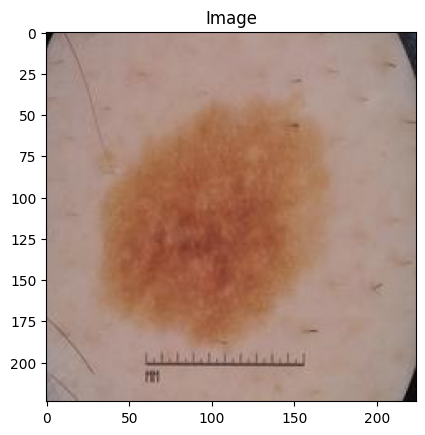

In [24]:
img_path = "/content/train/Malignant/1005.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title("Image")
plt.show()

In [25]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [26]:
model = tf.keras.applications.resnet50.ResNet50()

102967424/102967424 [==============================] - 5s 0us/step


In [27]:
def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

In [28]:
predict(img_path)

35363/35363 [==============================] - 0s 1us/step
[('n03314780', 'face_powder', 0.41675532), ('n03920288', 'Petri_dish', 0.13399243), ('n01990800', 'isopod', 0.07395116)]


# Making Deep Learning Fast with Fast AI

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns #для создания статистических графиков
import matplotlib.pyplot as plt #для создания визуализаций данных
import os #для работы с файловой системой
import random
import cv2 #для обработки изображений
import sklearn #для машинного обучения
from PIL import Image
from pathlib import Path #для работы с путями файлов
from fastai.vision.all import * #для быстрой разработки моделей машинного обучения, включая компьютерное зрение
from fastai.callback import * #для управления процессом обучения моделей
from fastai.metrics import error_rate #для измерения процента ошибок
from fastai.callback.tracker import EarlyStoppingCallback #для ранней остановки обучения модели при отсутствии улучшений
from sklearn.metrics import classification_report #для создания отчета о классификации
from sklearn.metrics import confusion_matrix #для построения матрицы ошибок

# Избавляемся от предупреждений, которые могут возникнуть в процессе выполнения кода
import warnings
warnings.filterwarnings('ignore')

In [6]:
path = Path('models')

In [7]:
PATH = Path("train")

In [8]:
files = list(PATH.glob("*/*.jpg"))

print(f'Total Images = {len(files)}')

Total Images = 11879


In [9]:
LABELS = os.listdir(PATH)
LABELS = sorted(LABELS)

for label in LABELS:
    total_images_label = list(Path(os.path.join(PATH, label)).glob("*.jpg"))
    print(f'* {label}: {len(total_images_label)} images\n')

* Benign: 6289 images

* Malignant: 5590 images



In [10]:
test_data = Path ("test")

In [11]:
# Создаем объект ImageDataLoaders, который автоматически загружает и предварительно обрабатывает изображения для обучения модели.
# Разделяем данные на тренировочные и валидационные в соотношении 80 / 20 (valid_pct=0.2)

dls = ImageDataLoaders.from_folder(PATH, train='train', valid_pct=0.2,
                                          item_tfms=Resize(460),
                                          batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]) # Включаем стандартные аугментации, такие как случайные повороты, масштабирование и отражения, меняя размер изображений до 224 пикселей

In [12]:
len(dls.train_ds)

9504

In [13]:
len(dls.valid_ds)

2375

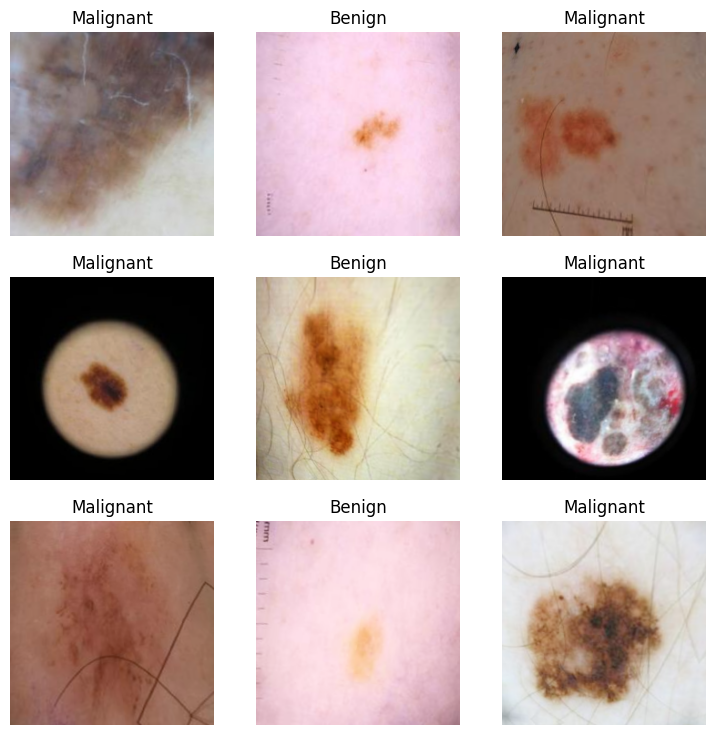

In [14]:
dls.show_batch()

In [15]:
# Создаем объект обучающего модуля (learner) с использованием архитектуры нейронной сети ResNet34.
# Объект learner будет использовать данные, загруженные при помощи dls, и оценивать качество модели с использованием метрики accuracy.

learn = vision_learner(dls,
                       resnet34, # Архитектура модели: ResNet34 — популярная свёрточная нейронная сеть
                       metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 70.9MB/s]


In [16]:
learn.model_dir = "/"

In [17]:
# Выводим подробное описание модели, включая информацию о каждом слое,
# количество параметров и используемую память.

learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

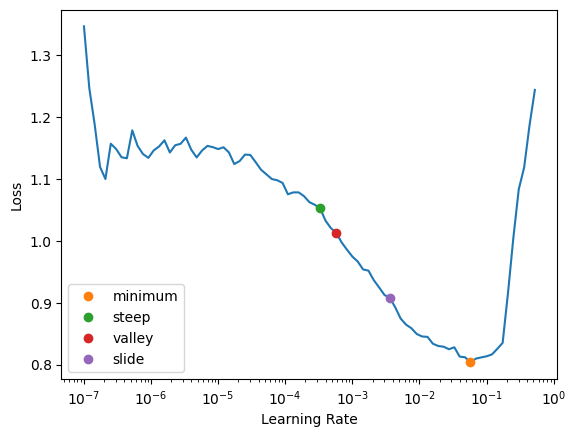

In [18]:
#поиск оптимальной начальной скорости обучения learning rate
#график зависимости ошибки от скорости обучения
# lr_find() помогает найти итеративную начальную скорость обучения для более эффективной тренировки модели
suggest_funcs = (minimum, steep, valley, slide)

lrs = learn.lr_find(suggest_funcs=suggest_funcs)

In [19]:
lrs

SuggestedLRs(minimum=0.005754399299621582, steep=0.0003311311302240938, valley=0.0005754399462603033, slide=0.00363078061491251)

In [29]:
# Обучаем модель в течение 3 эпох, используя стратегию One Cycle Policy для управления скоростью обучения.
# lr_max задается в виде среза от 'valley' до 'slide', которые были найдены с помощью learn.lr_find().

learn.fit_one_cycle(3, # Количество эпох обучения
                    lr_max=slice(lrs.valley, # Нижняя граница скорости обучения
                                 lrs.slide)) # Верхняя граница скорости обучения

#One Cycle Policy плавно изменяет скорость обучения в течение каждой эпохи, сначала увеличивая её до максимального значения, а затем постепенно уменьшает к концу эпохи.
#Таким образом, метод помогает модели быстрее сойтись и достичь лучших результатов по сравнению с фиксированной скоростью обучения.

epoch,train_loss,valid_loss,accuracy,time
0,0.292777,0.259817,0.880842,01:27
1,0.252667,0.232176,0.899789,01:27
2,0.228643,0.228041,0.897684,01:25


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

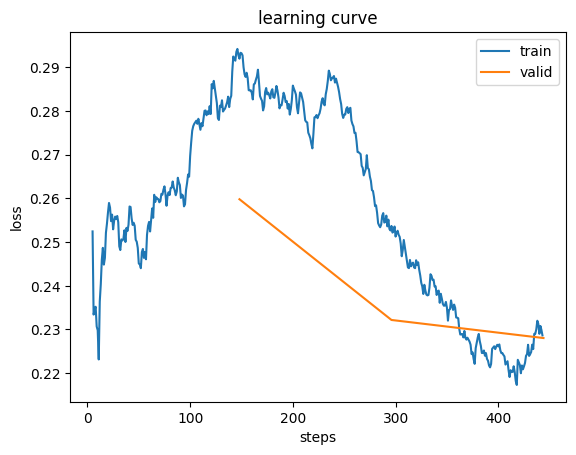

In [30]:
# Выводим график изменения ошибки (loss) в процессе обучения модели.
# Этот график помогает визуализировать, как ошибка менялась в течение эпох обучения.
learn.recorder.plot_loss()

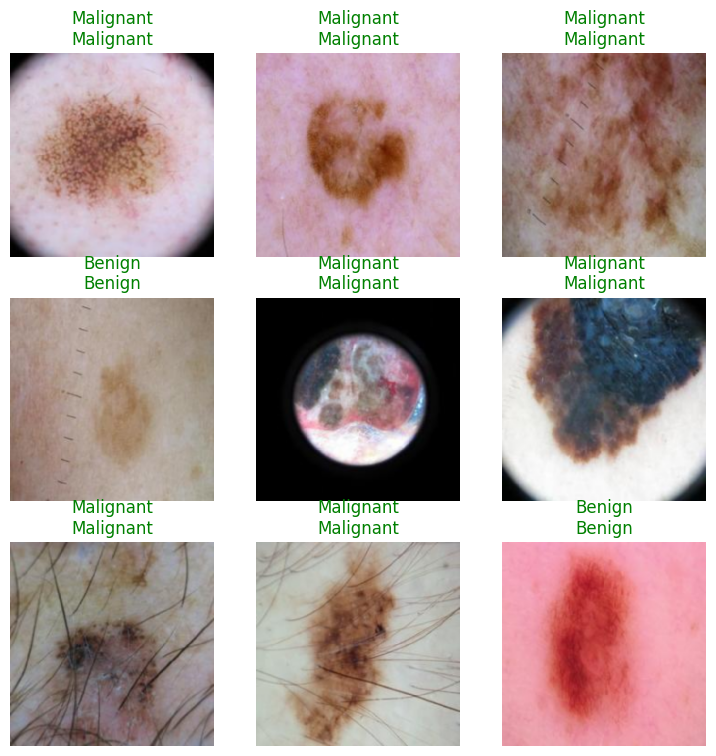

In [35]:
learn.show_results()

# Creating a special classifier using the method transfer learning using Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math

In [ ]:
import os
import shutil
import random

# Path to the main directory with images
source_dir = 'test'
# Path to the new directory where images will be copied
destination_dir = 'test_small'

# Create new directory and subdirectories
os.makedirs(os.path.join(destination_dir, 'Benign'), exist_ok=True)
os.makedirs(os.path.join(destination_dir, 'Malignant'), exist_ok=True)

# Function for randomly copying files
def copy_random_files(source_folder, dest_folder, num_files):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)
    # Select random files
    selected_files = random.sample(files, num_files)

    for file in selected_files:
        src_file = os.path.join(source_folder, file)
        dest_file = os.path.join(dest_folder, file)
        shutil.copy(src_file, dest_file)

# Copy 300 files from each folder
copy_random_files(os.path.join(source_dir, 'Benign'), os.path.join(destination_dir, 'Benign'), 300)
copy_random_files(os.path.join(source_dir, 'Malignant'), os.path.join(destination_dir, 'Malignant'), 300)

In [ ]:
TRAIN_DATA_DIR = 'train_small'
VALIDATION_DATA_DIR = 'test_small'
TRAIN_SAMPLES = 600
VALIDATION_SAMPLES = 600
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
 TRAIN_DATA_DIR,
 target_size=(IMG_WIDTH, IMG_HEIGHT),
 batch_size=BATCH_SIZE,
 shuffle=True,
 seed=12345,
 class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
 VALIDATION_DATA_DIR,
 target_size=(IMG_WIDTH, IMG_HEIGHT),
 batch_size=BATCH_SIZE,
 shuffle=False,
 class_mode='categorical')

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
#remove the last fully connected layers and replace them with our own classifier
def model_maker():
 base_model = MobileNet(include_top=False, input_shape =
 (IMG_WIDTH,IMG_HEIGHT,3))
 for layer in base_model.layers[:]:
  layer.trainable = False # Freeze the layers
 input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
 custom_model = base_model(input)
 custom_model = GlobalAveragePooling2D()(custom_model)
 custom_model = Dense(64, activation='relu')(custom_model)
 custom_model = Dropout(0.5)(custom_model)
 predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
 return Model(inputs=input, outputs=predictions)

In [ ]:
model = model_maker()
model.compile(loss='categorical_crossentropy',
 optimizer= tf.keras.optimizers.Adam(lr=0.001),
 metrics=['acc'])
num_steps = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)
model.fit_generator(train_generator,
 steps_per_epoch = num_steps,
 epochs=10,
 validation_data = validation_generator,
 validation_steps = num_steps)

<ipython-input-70-0b2c6c6b9011>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/10
10/10 [==============================] - 45s 5s/step - loss: 0.6906 - acc: 0.6467 - val_loss: 0.4415 - val_acc: 0.7867
Epoch 2/10
10/10 [==============================] - 62s 7s/step - loss: 0.4512 - acc: 0.7867 - val_loss: 0.3773 - val_acc: 0.8400
Epoch 3/10
10/10 [==============================] - 39s 4s/step - loss: 0.3685 - acc: 0.8533 - val_loss: 0.3561 - val_acc: 0.8700
Epoch 4/10
10/10 [==============================] - 40s 4s/step - loss: 0.3356 - acc: 0.8667 - val_loss: 0.3409 - val_acc: 0.8733
Epoch 5/10
10/10 [==============================] - 40s 4s/step - loss: 0.2867 - acc: 0.8817 - val_loss: 0.3415 - val_acc: 0.8567
Epoch 6/10
10/10 [==============================] - 40s 4s/step - loss: 0.2819 - acc: 0.8717 - val_loss: 0.3191 - val_acc: 0.8783
Epoch 7/10
10/10 [==============================] - 42s 4s/step - loss: 0.2343 - acc: 0.9183 - val_loss: 0.3075 - val_acc: 0.8833
Epoch 8/10
10/10 [==============================] - 40s 4s/step - loss: 0.2373 - acc: 0.90

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model = load_model('model.h5')

In [ ]:
img_path = '/content/test_small/Benign/6299.jpg'
img = image.load_img(img_path)
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array) # Preprocess the image
prediction = model.predict(preprocessed_img)
print(prediction)
print(validation_generator.class_indices)

1/1 [==============================] - 0s 407ms/step
[[0.7590815  0.24091853]]
{'Benign': 0, 'Malignant': 1}


In [ ]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
VALIDATION_DATA_DIR = '/content/test_small'
VALIDATION_BATCH_SIZE = 64
# Генераторы данных
validation_datagen = ImageDataGenerator(
 preprocessing_function=preprocess_input)
validation_generator = validation_datagen.flow_from_directory(
 VALIDATION_DATA_DIR,
 target_size=(IMG_WIDTH, IMG_HEIGHT),
 batch_size=VALIDATION_BATCH_SIZE,
 shuffle=False,
 class_mode='categorical')
ground_truth = validation_generator.classes

Found 600 images belonging to 2 classes.


In [ ]:
predictions = model.predict_generator(validation_generator)

<ipython-input-75-e232d9169a77>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


In [ ]:
# prediction_table - это словарь (dict) с индексом, прогнозом и истинным
# классом (ground truth)
prediction_table = {}
for index, val in enumerate(predictions):
 # получить индекс argmax
 index_of_highest_probability = np.argmax(val)
 value_of_highest_probability = val[index_of_highest_probability]
 prediction_table[index] = [value_of_highest_probability,
 index_of_highest_probability,
 ground_truth[index]]
 #assert len(predictions) == len(ground_truth) == len(prediction_table)


In [ ]:
def display(sorted_indices, message):
 similar_image_paths = []
 distances = []
 for name, value in sorted_indices:
  [probability, predicted_index, gt] = value
  similar_image_paths.append(VALIDATION_DATA_DIR + fnames[name])
  distances.append(probability)
 plot_images(similar_image_paths, distances, message)

In [ ]:
# Прогнозы относительно класса 'Benign' с наибольшими значениями вероятности
indices = get_images_with_sorted_probabilities(prediction_table,
get_highest_probability=True, label=1, number_of_items=10,
only_false_predictions=False)
message = 'Images with the highest probability of containing Benign'
display(indices[:10], message)

NameError: name 'get_images_with_sorted_probabilities' is not defined